# Goal

1. Explore Top Paying Roles and Skills in the Data Science Industry
2. Use Python to Explore a Real Dataset on Job Postings
3. Use Insights to Help Find Best Job Opportunities

# Final Deliverables:

1. Create Jupyter Notebooks Showcasing Python Skills
2. Create a Summary (via README.md) Capturing Findings
3. Share Project via GitHub and LinkedIn

# Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
from adjustText import adjust_text
import seaborn as sns # Here is our new package call after conda install

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

##### Filter for US Data Analyst Roles

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

Text(0.5, 1.0, 'Top 10 Data Analyst Job Locations in USA')

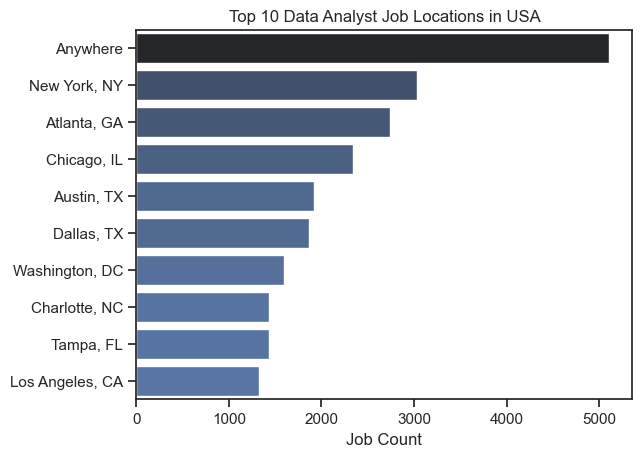

In [15]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Job Count')
plt.ylabel('')
plt.title('Top 10 Data Analyst Job Locations in USA')

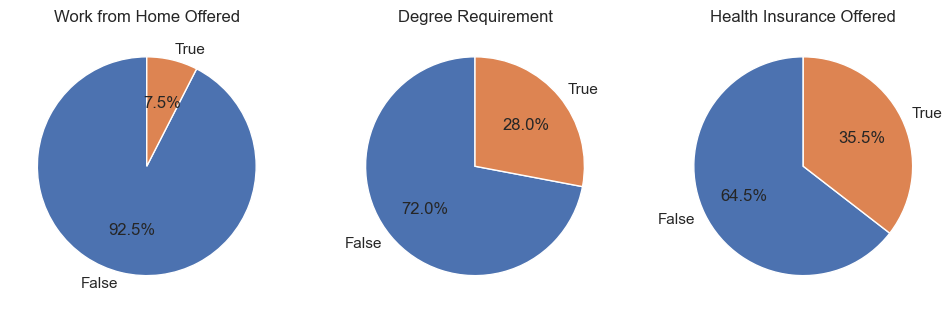

In [17]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


plt.show()

Text(0.5, 1.0, 'Companies Hiring Most Data Analysts in USA')

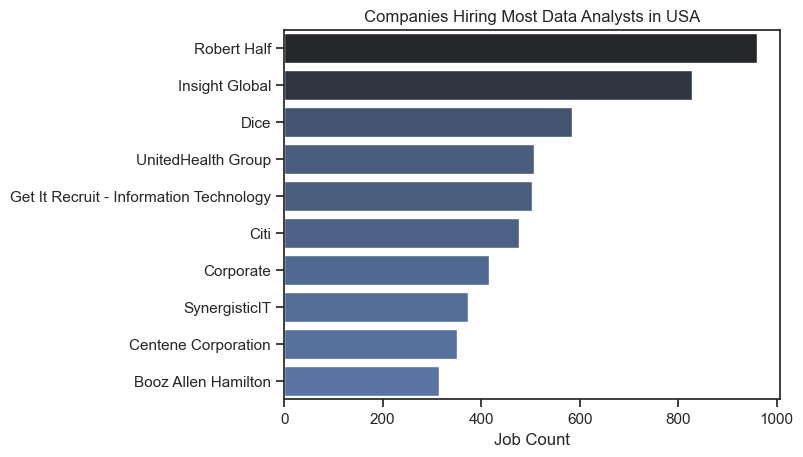

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Job Count')
plt.ylabel('')
plt.title('Companies Hiring Most Data Analysts in USA')